In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [11]:
dulieu = pd.read_csv(r"C:\Users\FPTSHOP\Downloads\DU_LIEU_FB_DACHUANHOA.csv")
print(dulieu)
# kiểm tra giá trị lỗi
print(dulieu.isnull().sum())


     So_bai_viet  So_binh_luan  So_luot_thich  So_bai_viet_Normalized  \
0             88           183            386                0.888889   
1             78           198            218                0.787879   
2             64           188            376                0.646465   
3             92           198            299                0.929293   
4             57           124            432                0.575758   
..           ...           ...            ...                     ...   
295           10            16             72                0.101010   
296           16            48             25                0.161616   
297            7            19             46                0.070707   
298            3            47             85                0.030303   
299            5            24             55                0.050505   

     So_binh_luan_Normalized  So_luot_thich_Normalized  
0                   0.919598                  0.786151  
1        

In [12]:
# Chọn các cột đã chuẩn hóa
du_lieu_normalized = dulieu[['So_bai_viet_Normalized', 'So_binh_luan_Normalized', 'So_luot_thich_Normalized']]


In [13]:
# Áp dụng K-means với n_init được thiết lập rõ ràng
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dulieu['Nhom'] = kmeans.fit_predict(du_lieu_normalized)


In [14]:
labels = ['Người dùng tích cực', 'Người dùng bình thường', 'Người dùng ít tích cực']
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=du_lieu_normalized.columns)
centroids['Nhãn'] = labels


In [16]:
mse = 0
for i in range(3):
    clustered_data = du_lieu_normalized[dulieu['Nhom'] == i]
    centroid = kmeans.cluster_centers_[i]
    mse += ((clustered_data - centroid) ** 2).sum().sum() / len(clustered_data)
mse /= 3
print(f'Mean Square Error: {mse}')


Mean Square Error: 0.03285815631007766


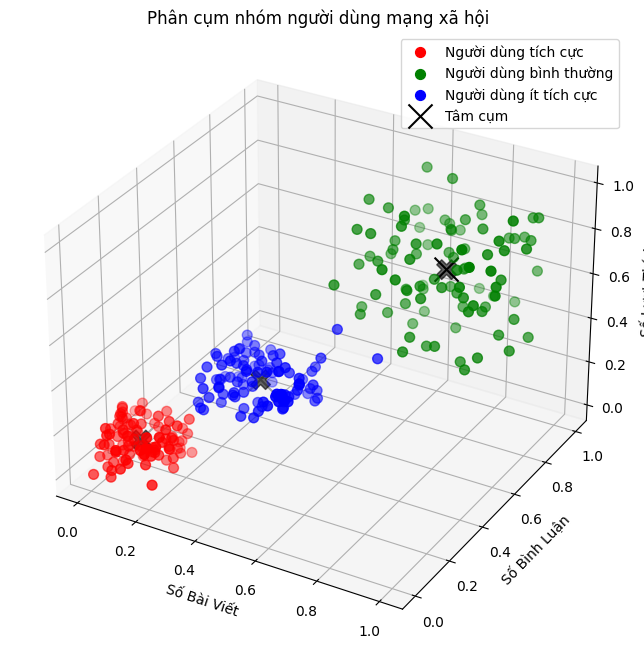

In [18]:
# Trực quan hóa kết quả
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    clustered_data = dulieu[dulieu['Nhom'] == i]
    ax.scatter(clustered_data['So_bai_viet_Normalized'], clustered_data['So_binh_luan_Normalized'], clustered_data['So_luot_thich_Normalized'], 
               c=colors[i], label=labels[i], s=50)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='black', s=200, alpha=0.6, marker='X')

# for i, txt in enumerate(centroids['Nhãn']):
#     ax.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 2], marker='x', s=300, c='black', label='Tâm cụm')
    
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=300, c='black', label='Tâm cụm')


ax.set_xlabel('Số Bài Viết')
ax.set_ylabel('Số Bình Luận')
ax.set_zlabel('Số Lượt Thích')
ax.set_title('Phân cụm nhóm người dùng mạng xã hội')
ax.legend()
plt.show()